In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = 16, 5
plt.rcParams['figure.dpi'] = 150
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 20

#### Step-1 Load Data

In [3]:
from sklearn.datasets import fetch_openml

In [4]:
mnist = fetch_openml('mnist_784', version=1)

In [5]:
X, y = mnist['data'], mnist['target']

# MNIST

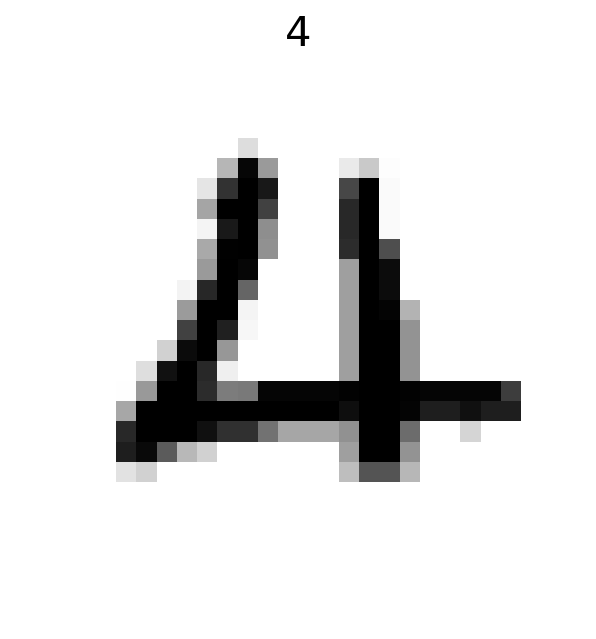

In [6]:
plt.imshow(X[1220].reshape(28, 28), cmap='binary')
plt.axis('off')
plt.title(y[1220])
plt.show()

In [7]:
y = y.astype(np.uint8)

In [8]:
y

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

#### EDA

### Split Data into Train Test

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [11]:
X_train.shape

(63000, 784)

In [12]:
X_test.shape

(7000, 784)

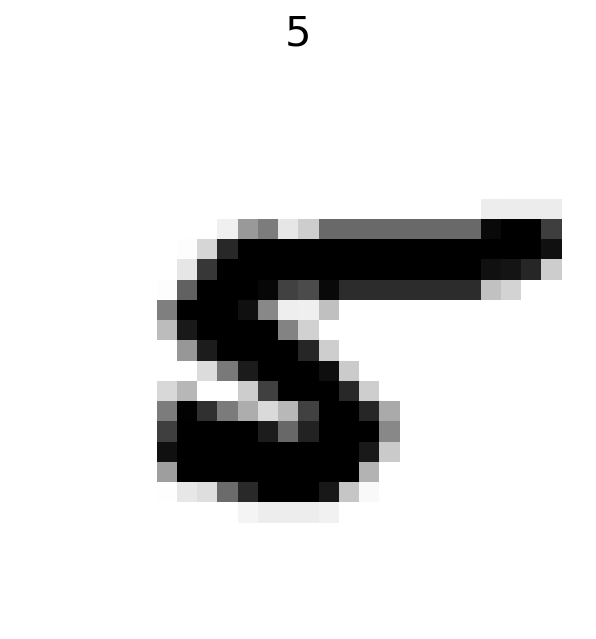

In [13]:
plt.imshow(X_train[35].reshape(28, 28), cmap='binary')
plt.axis('off')
plt.title(y_train[35])
plt.show()

## Binary Classifier 

`5 predictor`

In [14]:
y_train_5 = (y_train == 5)

In [15]:
y_test_5 = (y_test == 5)

In [16]:
y_train_5[35]

True

#### Model Selection 

In [17]:
from sklearn.linear_model import SGDClassifier

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
forest_clf = RandomForestClassifier()

In [20]:
sgd_clf = SGDClassifier(random_state=42)

#### Fitting Training Data to Model

In [21]:
forest_clf.fit(X_train, y_train_5)

RandomForestClassifier()

In [22]:
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

##### Prediction

In [23]:
forest_clf.predict([X_train[3], X_train[103], X_train[35] ])

array([ True, False,  True])

In [24]:
sgd_clf.predict([X_train[3], X_train[103], X_train[35] ])

array([False, False,  True])

    pos -> neg -> fn 

    neg -> pos -> fp

In [25]:
forest_clf.predict_proba([X_train[3], X_train[103], X_train[35] ])

array([[0.17, 0.83],
       [1.  , 0.  ],
       [0.05, 0.95]])

In [26]:
sgd_clf.decision_function([X_train[3], X_train[103], X_train[35] ])

array([ -2317.90335308, -10230.9433525 ,   1206.70136954])

In [27]:
pred = forest_clf.predict(X_test)
pred_score = forest_clf.predict_proba(X_test)

In [28]:
y_pred = sgd_clf.predict(X_test)
y_pred_score = sgd_clf.decision_function(X_test)

In [29]:
y_pred_score[:5]

array([-3839.59782429, -7423.24861245,    -9.78486268, -7232.44682968,
       -7713.3124503 ])

In [30]:
pred_score[:5]

array([[0.96, 0.04],
       [1.  , 0.  ],
       [0.85, 0.15],
       [1.  , 0.  ],
       [0.99, 0.01]])

In [31]:
acc_r = sum(y_test_5 == pred) / len(y_test_5)
acc_r

0.9892857142857143

In [32]:
acc = sum(y_test_5 == y_pred) / len(y_test_5)

In [33]:
acc

0.9684285714285714

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
print(confusion_matrix(y_test_5, y_pred)) # SGD

[[6289   53]
 [ 168  490]]


In [36]:
print(confusion_matrix(y_test_5, pred)) # Random Forrest 

[[6341    1]
 [  74  584]]


In [37]:
from sklearn.metrics import precision_score

In [38]:
print(precision_score(y_test_5, y_pred)) # SGD

0.9023941068139963


In [39]:
print(precision_score(y_test_5, pred)) # Random Forrest

0.9982905982905983


In [40]:
from sklearn.metrics import recall_score

In [41]:
print(recall_score(y_test_5, y_pred)) # SGD

0.7446808510638298


In [42]:
print(recall_score(y_test_5, pred)) # Random Forrest

0.8875379939209727


In [43]:
from sklearn.metrics import f1_score

In [44]:
print(f1_score(y_test_5, y_pred)) # SGD

0.8159866777685262


In [45]:
print(f1_score(y_test_5, pred)) # Random Forrest

0.9396621078037007


In [46]:
y_pred_score[:20].astype(int)

array([ -3839,  -7423,     -9,  -7232,  -7713, -24795,  -8691,  -7840,
        -6084, -16331, -11988,  -5450,  -8929,  -8883, -10518,  12024,
        -8289,  -2911, -11649,  -6263])

In [47]:
print(precision_score(y_test_5, y_pred)) # SGD

0.9023941068139963


In [48]:
print(recall_score(y_test_5, y_pred)) # SGD

0.7446808510638298


![thresholds](thresholds.jpg)

In [49]:
thres = 0
p = y_pred_score > thres
print("Confusion Matrix: \n", confusion_matrix(y_test_5, p))
print("Precision: ", precision_score(y_test_5, p)) # SGD
print("Recall: ", recall_score(y_test_5, p)) # SGD

Confusion Matrix: 
 [[6289   53]
 [ 168  490]]
Precision:  0.9023941068139963
Recall:  0.7446808510638298


In [50]:
thres = 7000
p = y_pred_score > thres
print("Confusion Matrix: \n", confusion_matrix(y_test_5, p))
print("Precision: ", precision_score(y_test_5, p)) # SGD
print("Recall: ", recall_score(y_test_5, p)) # SGD

Confusion Matrix: 
 [[6340    2]
 [ 581   77]]
Precision:  0.9746835443037974
Recall:  0.11702127659574468


In [51]:
thres = -13000
p = y_pred_score > thres
print("Confusion Matrix: \n", confusion_matrix(y_test_5, p))
print("Precision: ", precision_score(y_test_5, p)) # SGD
print("Recall: ", recall_score(y_test_5, p)) # SGD

Confusion Matrix: 
 [[1185 5157]
 [   3  655]]
Precision:  0.11269786648313833
Recall:  0.9954407294832827


In [52]:
from sklearn.metrics import precision_recall_curve

In [53]:
scores = sgd_clf.decision_function(X_test)
precision, recall, thresholds = precision_recall_curve(y_test_5, scores)


In [54]:
def plot_precision_recall_vs_threshold(precision, recall, thresholds):
    plt.plot(thresholds, precision[:-1], '--b', label='Precision')
    plt.plot(thresholds, recall[:-1], '-g', label='Recall')
    plt.legend(loc=1)
    plt.xlabel("Thresholds")
    plt.title('Precision vs Recall Tradeoff')
    
    plt.yticks(np.arange(0, 1.1, .1))
    plt.ylim([0, 1.2])
    plt.plot([-15000, 1000], [0.65, 0.65], 'r:o')
    plt.plot([-15000, 1000], [0.95, 0.95], 'r:o')
    plt.plot([1000, 1000], [0, 1], ':k')
    plt.grid()
    plt.show()
    

In [55]:
print("Precision: ", precision_score(y_test_5, y_pred)) # SGD
print("Recall: ",recall_score(y_test_5, y_pred)) # SGD

Precision:  0.9023941068139963
Recall:  0.7446808510638298


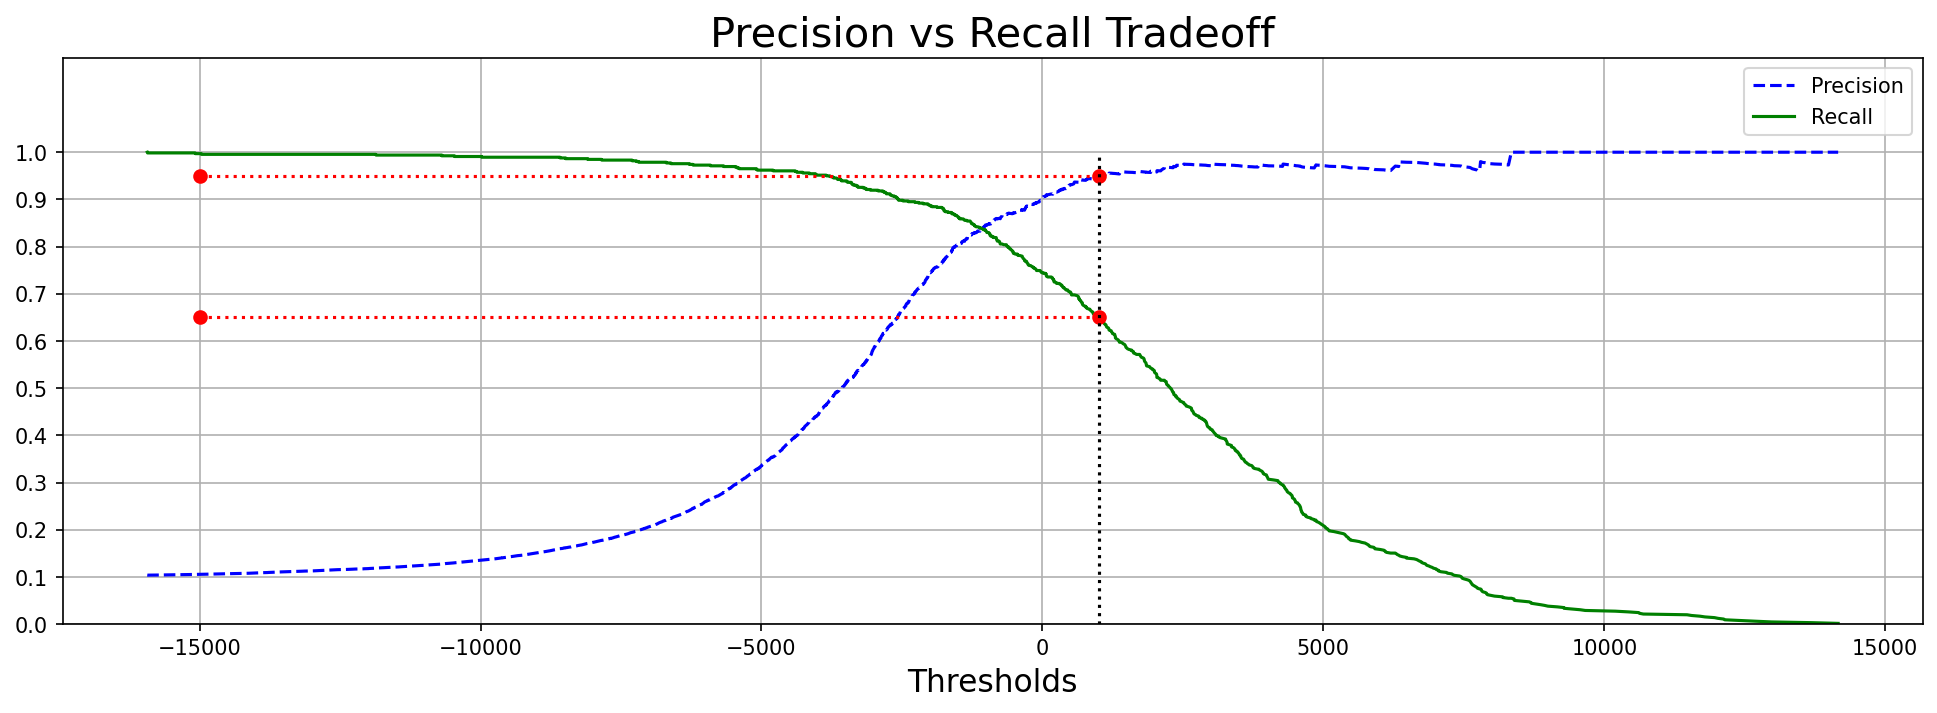

In [56]:
plot_precision_recall_vs_threshold(precision, recall, thresholds)

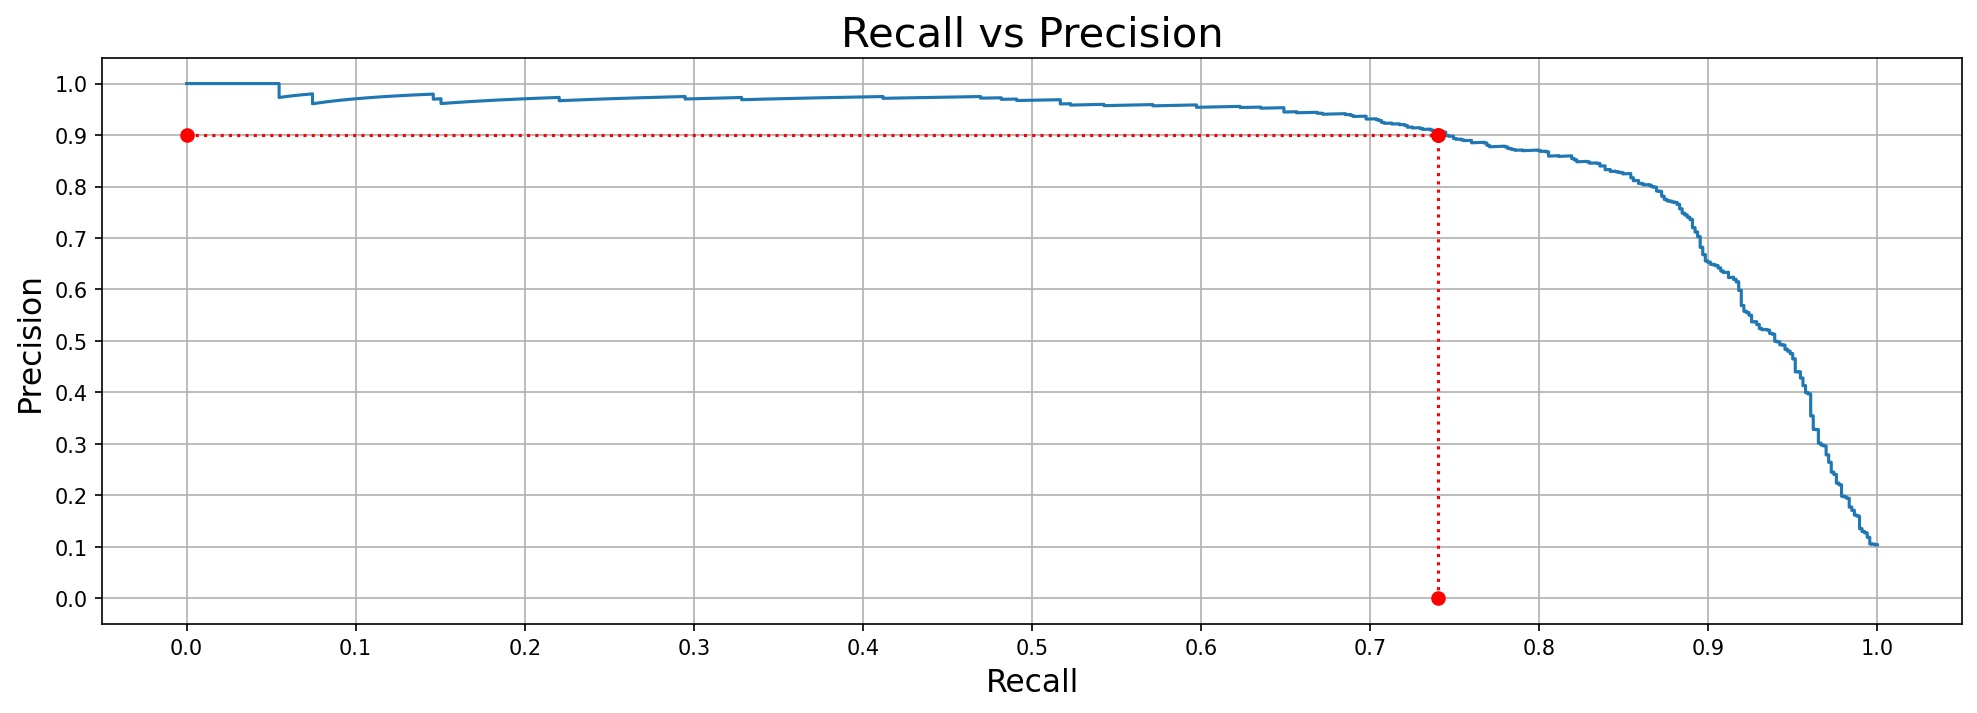

In [57]:
plt.title("Recall vs Precision")
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xticks(np.arange(0, 1.1, .1))
plt.yticks(np.arange(0, 1.1, .1))
plt.plot([0, 0.74], [0.9, 0.9], 'r:o')
plt.plot([0.74, 0.74], [0.0, 0.9], 'r:o')
plt.plot([])
plt.grid()
plt.show()

In [72]:
i = np.argmax(precision >= 0.90) # np.argmax -> index value of first True value 
i

5793

In [73]:
th = thresholds[i]

In [74]:
th

-9.78486267869981

In [77]:
p = y_pred_score > 0.9
precision_score(y_test_5, p)


0.9040590405904059

In [80]:
recall_score(y_test_5, p)


0.7446808510638298

In [64]:
i = np.argmax(y_pred_score >= 0.5)
th = y_pred_score[15]

In [65]:
th

12024.368948506424

In [69]:
p = y_pred_score > 9000

In [70]:
precision_score(y_test_5, p)


1.0

In [71]:
recall_score(y_test_5, p)

0.0364741641337386

    False Positive - 0 , pricision - 1 at what cost of recall 

### The ROC Curve 

    The Receiver Operating Characteristic (ROC) Curve
    
    
    The Area Under the Curve (AUC) 

In [82]:
from sklearn.metrics import roc_curve

In [84]:
fpr, tpr, thresholds = roc_curve(y_test_5, y_pred_score)

In [152]:
def plot_roc_curve(fpr, tpr, label):
    plt.plot(fpr, tpr, 'r--', lw=5, label=label)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.title("ROC Curve")
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.legend()
    plt.show()
    

In [144]:
i = np.argmax(tpr >= 0.45)

In [145]:
thresholds[i]

2515.4906445828924

In [146]:
p = y_pred_score >= thresholds[i]

In [147]:
confusion_matrix(y_test_5, p)

array([[6334,    8],
       [ 349,  309]], dtype=int64)

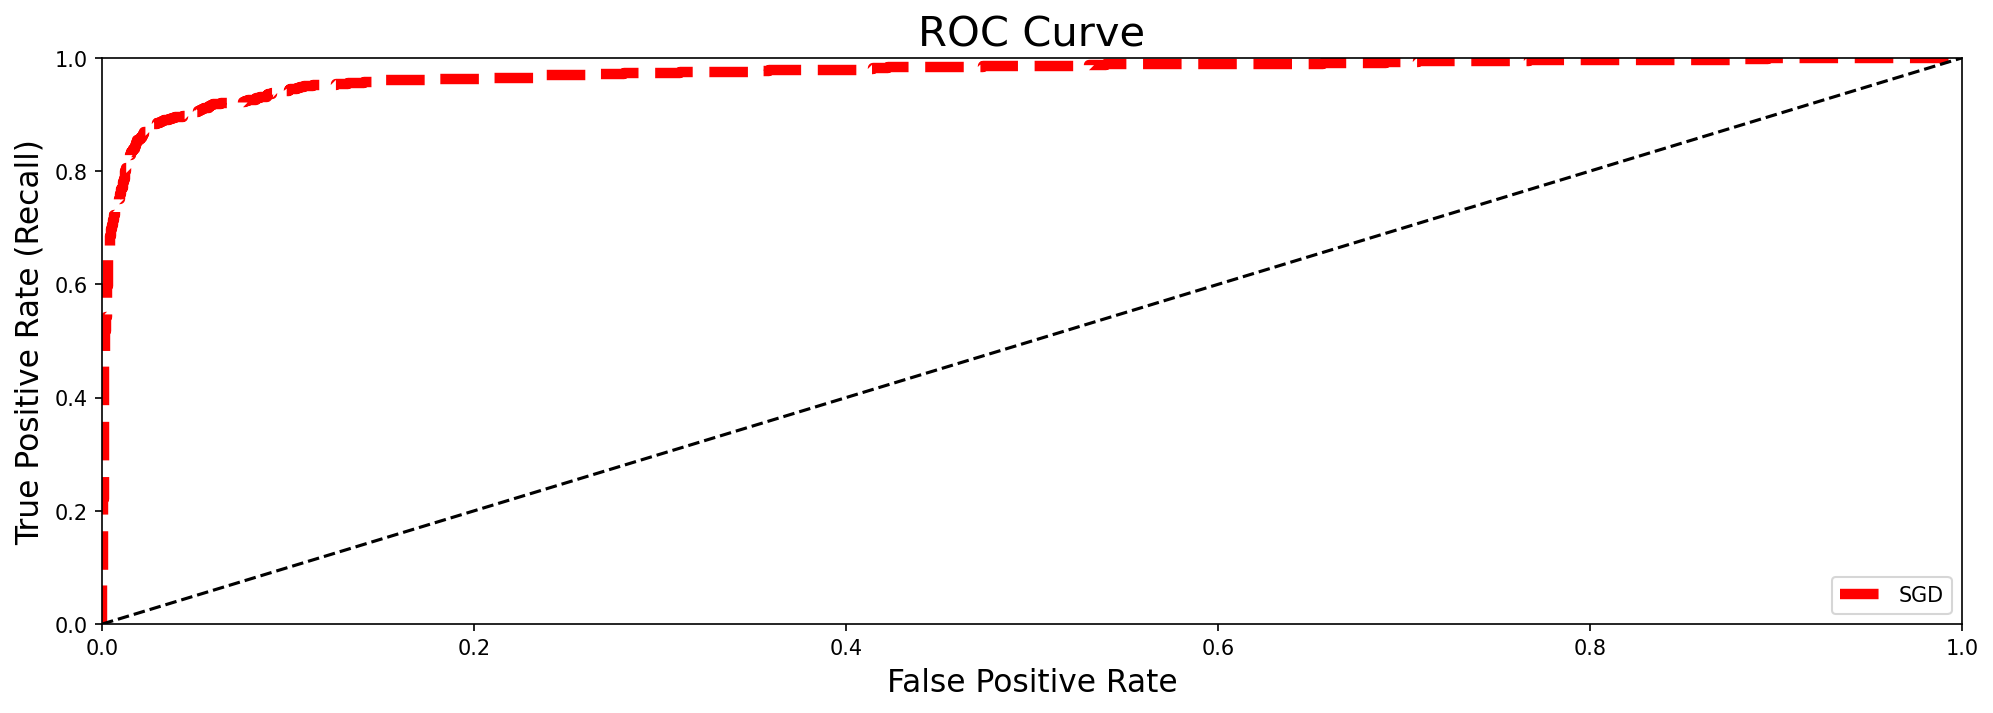

In [153]:
plot_roc_curve(fpr, tpr, 'SGD')

In [149]:
rf_score = pred_score[:, 1]

In [150]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_5, rf_score)

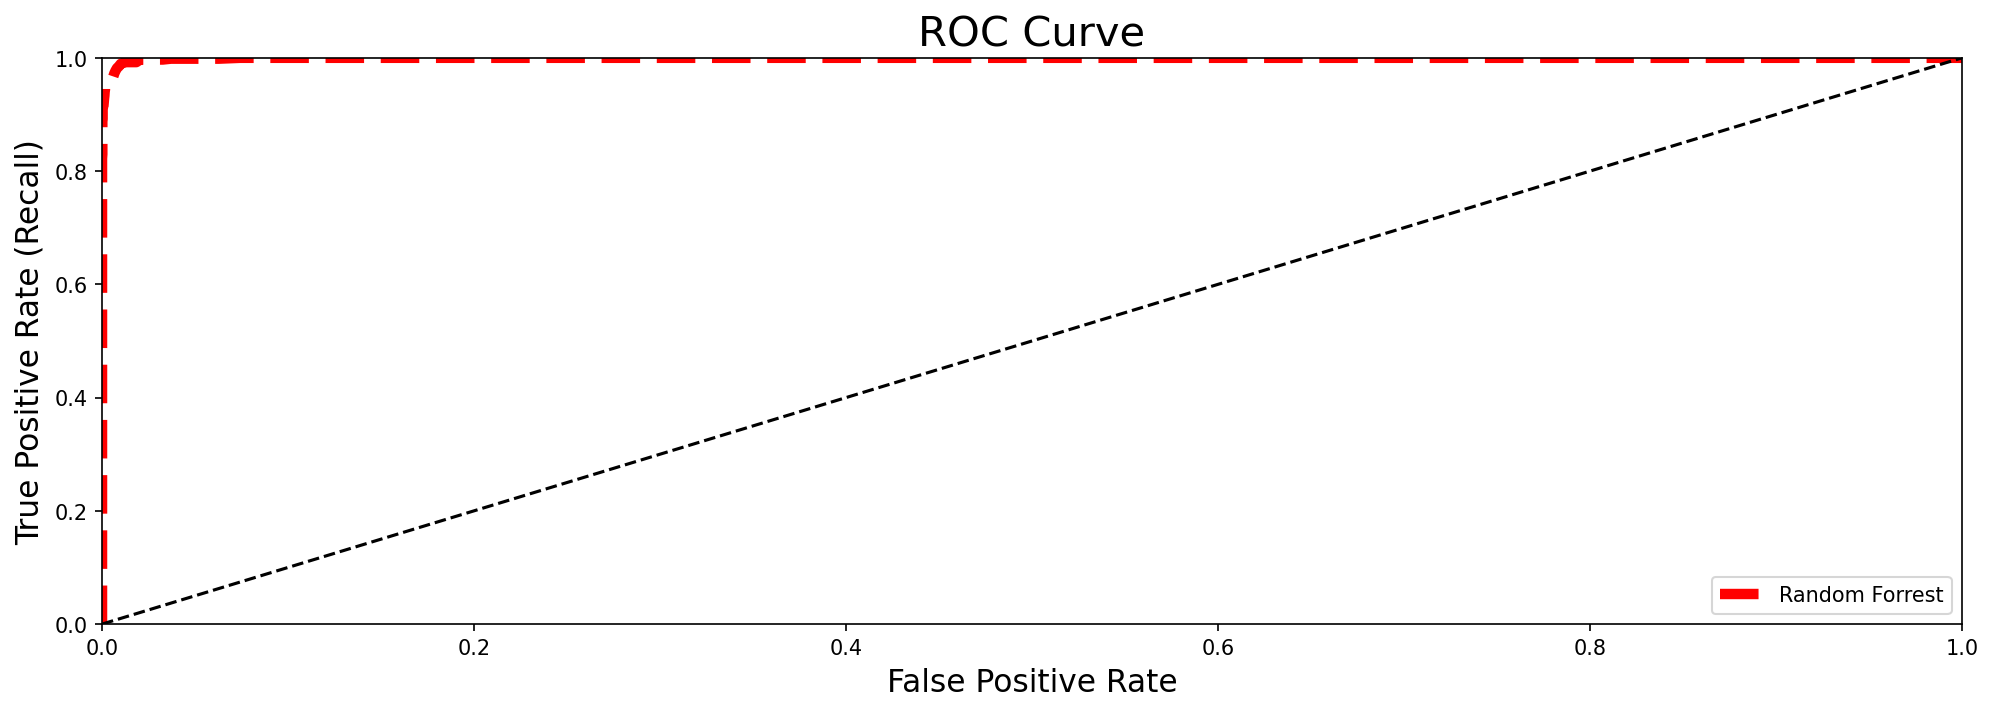

In [154]:
plot_roc_curve(fpr_rf, tpr_rf, 'Random Forrest')

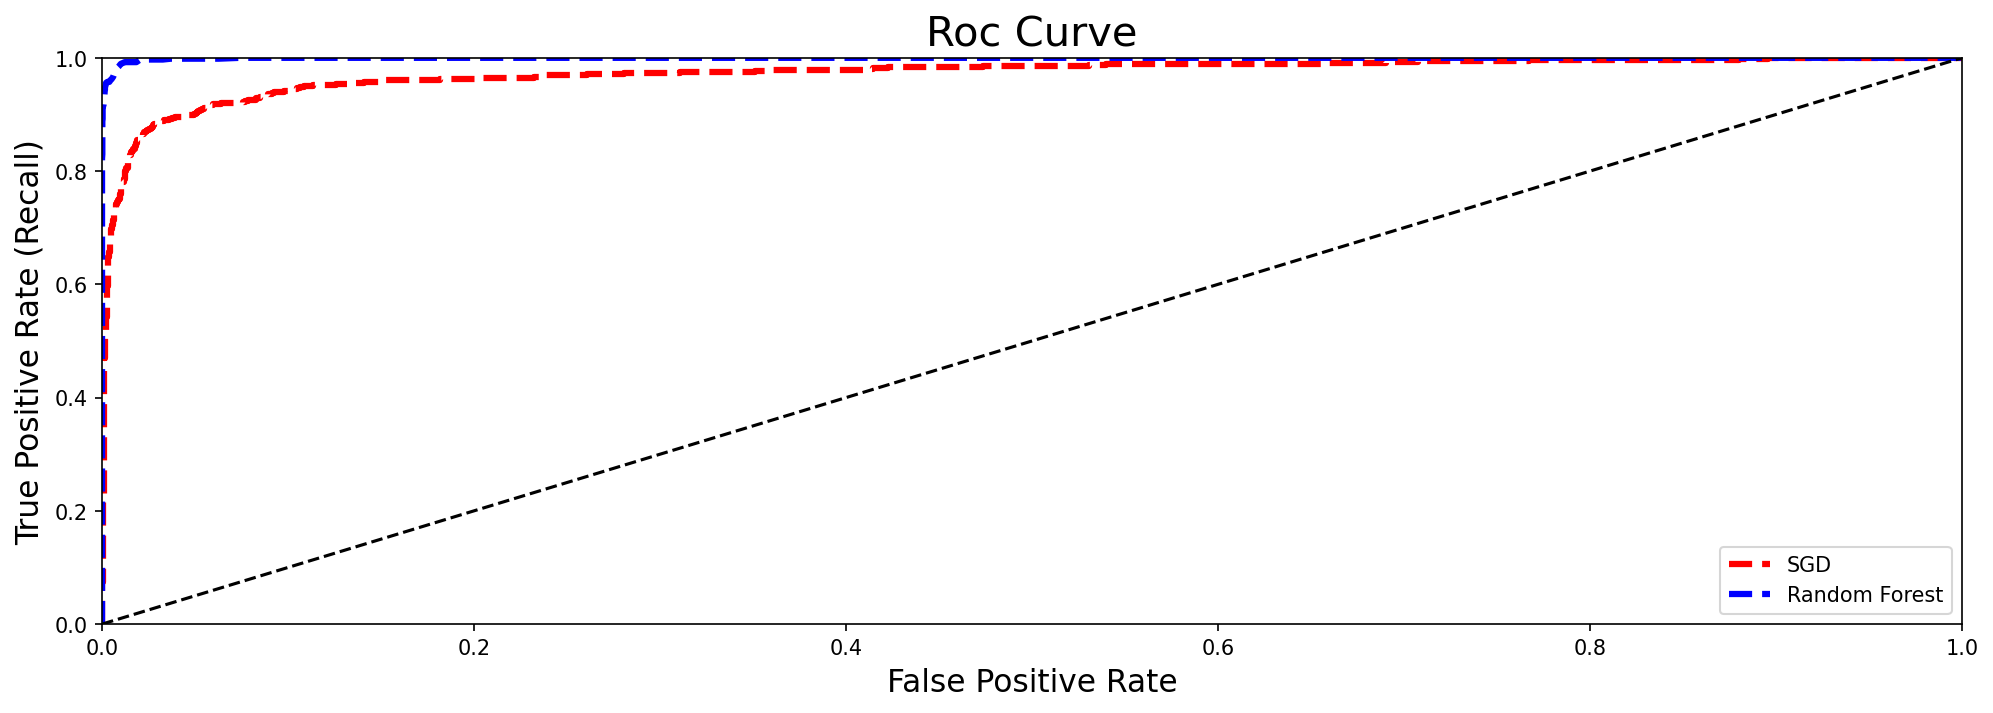

In [159]:
plt.plot(fpr, tpr, 'r--', lw=3, label='SGD')
plt.plot(fpr_rf, tpr_rf, 'b--', lw=3, label='Random Forest')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend()
plt.title("Roc Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.show()


In [160]:
from sklearn.metrics import roc_auc_score

In [166]:
print("SGD: ", roc_auc_score(y_test_5, y_pred_score,))
print("Random Forest: ", roc_auc_score(y_test_5, pred_score[:, 1]))

SGD:  0.9725458874546016
Random Forest:  0.9994240404348297


In [168]:
print("Precision : ", precision_score(y_test_5, pred))
print("Recall: ", recall_score(y_test_5, pred))

Precision :  0.9982905982905983
Recall:  0.8875379939209727


### Multi-Class / Multinomial Classification